##Plot growth curces from OD measured between Jun 14 and June 21

In [1]:
import numpy as np
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (24, 8)
import seaborn as sns

In [2]:
# Make sure your package version >= them
print('matplotlib: ', m.__version__)
print('numpy: ', np.__version__)
print('pandas: ', pd.__version__)
print('seaborn: ', sns.__version__)

matplotlib:  3.5.1
numpy:  1.21.6
pandas:  1.3.5
seaborn:  0.11.2


In [4]:
ds = pd.read_csv('./2022_06_17_growthcurvedata.csv') 
ds2 = pd.read_csv('./2022_06_21_growthcurvedata.csv')
print(ds2)

          Time  Temperature(¡C)      A1      A2      A3      A4      A5  \
0      0:00:00             27.0  0.0900  0.0905  0.0909  0.0897  0.0902   
1      2:30:01             27.0  0.0898  0.0901  0.0904  0.0894  0.0899   
2      5:00:02             27.5  0.0894  0.0896  0.0899  0.0892  0.0892   
3      7:30:03             27.5  0.0893  0.0896  0.0898  0.0892  0.0891   
4     10:00:05             27.0  0.0895  0.0898  0.0902  0.0893  0.0895   
5     12:30:06             27.0  0.0894  0.0896  0.0900  0.0891  0.0894   
6     15:00:07             27.0  0.0897  0.0899  0.0903  0.0892  0.0897   
7     17:30:08             27.0  0.0900  0.0904  0.0910  0.0897  0.0902   
8     20:00:09             27.0  0.0905  0.0910  0.0914  0.0902  0.0907   
9     22:30:10             27.0  0.0905  0.0909  0.0914  0.0902  0.0907   
10    25:00:12             27.0  0.0905  0.0910  0.0914  0.0901  0.0907   
11    28:30:13             27.5  0.0901  0.0906  0.0911  0.0898  0.0903   
12  1.06:00:14           

##Having some issues with time delta, just stack dataframes and make fake time vector

In [5]:
data=pd.concat([ds, ds2], axis=0) #vertically stack the arrays
data.reset_index(inplace=True, drop=False) #renumber the indices so there are no duplicates
data

,index,Time,Temperature(¡C),A1,A2,A3,A4,A5,A6,A7,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0,0:00:00,28.5,0.0900,0.0910,0.0910,0.0899,0.0909,0.0879,0.0889,...,0.0930,0.0920,0.0868,0.0885,0.0880,0.0872,0.0875,0.0867,0.0900,0.0868
1,1,2:30:01,29.0,0.0893,0.0899,0.0899,0.0894,0.0893,0.0870,0.0881,...,0.0917,0.0903,0.0860,0.0876,0.0875,0.0864,0.0868,0.0865,0.0894,0.0865
2,2,5:00:03,29.0,0.0893,0.0897,0.0895,0.0894,0.0888,0.0871,0.0882,...,0.0913,0.0901,0.0859,0.0876,0.0874,0.0863,0.0869,0.0866,0.0896,0.0862
3,3,7:30:05,28.5,0.0892,0.0897,0.0896,0.0894,0.0888,0.0871,0.0881,...,0.0914,0.0903,0.0858,0.0877,0.0874,0.0862,0.0868,0.0865,0.0895,0.0862
4,4,10:00:07,28.5,0.0892,0.0895,0.0894,0.0894,0.0886,0.0871,0.0881,...,0.0910,0.0897,0.0857,0.0875,0.0870,0.0862,0.0868,0.0862,0.0892,0.0862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,34,3.13:00:40,30.0,0.0889,0.0890,0.0889,0.0891,0.0876,0.0867,0.0876,...,0.0906,0.0894,0.0854,0.0874,0.0868,0.0861,0.0863,0.0860,0.0889,0.0858
63,35,3.15:30:41,30.0,0.0889,0.0889,0.0889,0.0890,0.0877,0.0866,0.0876,...,0.0905,0.0894,0.0855,0.0873,0.0869,0.0861,0.0863,0.0860,0.0889,0.0857
64,36,3.18:00:42,29.5,0.0889,0.0890,0.0891,0.0889,0.0880,0.0867,0.0876,...,0.0906,0.0898,0.0856,0.0874,0.0868,0.0861,0.0865,0.0862,0.0889,0.0860
65,37,3.20:30:44,30.0,0.0888,0.0888,0.0888,0.0889,0.0878,0.0865,0.0875,...,0.0904,0.0894,0.0854,0.0871,0.0869,0.0860,0.0864,0.0858,0.0887,0.0858


In [6]:
new_dates=np.arange(67)*2.5/24 #hours to days
new_dates

array([0.        , 0.10416667, 0.20833333, 0.3125    , 0.41666667,
       0.52083333, 0.625     , 0.72916667, 0.83333333, 0.9375    ,
       1.04166667, 1.14583333, 1.25      , 1.35416667, 1.45833333,
       1.5625    , 1.66666667, 1.77083333, 1.875     , 1.97916667,
       2.08333333, 2.1875    , 2.29166667, 2.39583333, 2.5       ,
       2.60416667, 2.70833333, 2.8125    , 2.91666667, 3.02083333,
       3.125     , 3.22916667, 3.33333333, 3.4375    , 3.54166667,
       3.64583333, 3.75      , 3.85416667, 3.95833333, 4.0625    ,
       4.16666667, 4.27083333, 4.375     , 4.47916667, 4.58333333,
       4.6875    , 4.79166667, 4.89583333, 5.        , 5.10416667,
       5.20833333, 5.3125    , 5.41666667, 5.52083333, 5.625     ,
       5.72916667, 5.83333333, 5.9375    , 6.04166667, 6.14583333,
       6.25      , 6.35416667, 6.45833333, 6.5625    , 6.66666667,
       6.77083333, 6.875     ])

In [7]:
data['Time']=new_dates
data

,index,Time,Temperature(¡C),A1,A2,A3,A4,A5,A6,A7,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0,0.000000,28.5,0.0900,0.0910,0.0910,0.0899,0.0909,0.0879,0.0889,...,0.0930,0.0920,0.0868,0.0885,0.0880,0.0872,0.0875,0.0867,0.0900,0.0868
1,1,0.104167,29.0,0.0893,0.0899,0.0899,0.0894,0.0893,0.0870,0.0881,...,0.0917,0.0903,0.0860,0.0876,0.0875,0.0864,0.0868,0.0865,0.0894,0.0865
2,2,0.208333,29.0,0.0893,0.0897,0.0895,0.0894,0.0888,0.0871,0.0882,...,0.0913,0.0901,0.0859,0.0876,0.0874,0.0863,0.0869,0.0866,0.0896,0.0862
3,3,0.312500,28.5,0.0892,0.0897,0.0896,0.0894,0.0888,0.0871,0.0881,...,0.0914,0.0903,0.0858,0.0877,0.0874,0.0862,0.0868,0.0865,0.0895,0.0862
4,4,0.416667,28.5,0.0892,0.0895,0.0894,0.0894,0.0886,0.0871,0.0881,...,0.0910,0.0897,0.0857,0.0875,0.0870,0.0862,0.0868,0.0862,0.0892,0.0862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,34,6.458333,30.0,0.0889,0.0890,0.0889,0.0891,0.0876,0.0867,0.0876,...,0.0906,0.0894,0.0854,0.0874,0.0868,0.0861,0.0863,0.0860,0.0889,0.0858
63,35,6.562500,30.0,0.0889,0.0889,0.0889,0.0890,0.0877,0.0866,0.0876,...,0.0905,0.0894,0.0855,0.0873,0.0869,0.0861,0.0863,0.0860,0.0889,0.0857
64,36,6.666667,29.5,0.0889,0.0890,0.0891,0.0889,0.0880,0.0867,0.0876,...,0.0906,0.0898,0.0856,0.0874,0.0868,0.0861,0.0865,0.0862,0.0889,0.0860
65,37,6.770833,30.0,0.0888,0.0888,0.0888,0.0889,0.0878,0.0865,0.0875,...,0.0904,0.0894,0.0854,0.0871,0.0869,0.0860,0.0864,0.0858,0.0887,0.0858


##Make growth curve plots for each strain: subtract the correct blank, average 2 or 3 replicates, take natural log

<AxesSubplot:>

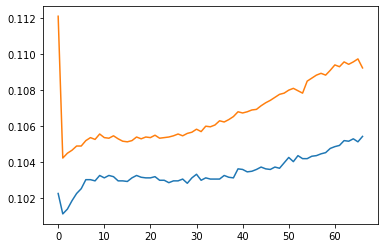

In [8]:
r2a_blank = data[['G5','G6','G7']].mean(axis=1) #EDIT 06/24/2022 take mean of blank replicates, but keep variation in time as it seems volume diminishes with time
r2g_blank = data[['B5','B6','B7']].mean(axis=1)
r2a_blank
r2a_blank.plot()
r2g_blank.plot()

In [9]:
a=data[['C2','C3','C4']]
check=a.sub(r2g_blank, axis='rows')
check

,C2,C3,C4
0,0.032800,0.030700,0.032700
1,0.039267,0.038467,0.039767
2,0.052600,0.049400,0.044700
3,0.062933,0.053533,0.049933
4,0.071700,0.068800,0.059200
...,...,...,...
62,0.034433,0.035333,0.031833
63,0.034467,0.035967,0.031067
64,0.033433,0.034833,0.033133
65,0.033167,0.032467,0.030867


In [10]:
HB15_1 = data[['C2','C3','C4']].sub(r2g_blank,axis='rows')
HB15_2 = data[['D2','D3','D4']].sub(r2g_blank,axis='rows')
HB15_3 = data[['E2','E3','E4']].sub(r2g_blank,axis='rows')
HB15_4 = data[['F2','F3','F4']].sub(r2g_blank,axis='rows')
HB15_5 = data[['G2','G3','G4']].sub(r2g_blank,axis='rows')

HA14_1 = data[['C5']].sub(r2a_blank,axis='rows') #no C6
HA33_1 = data[['D5','D6']].sub(r2a_blank,axis='rows')
HA54_1 = data[['E5','E6']].sub(r2a_blank,axis='rows')
HA57_1 = data[['F5','F6']].sub(r2a_blank,axis='rows')

HA14_2 = data[['C7','C8']].sub(r2a_blank,axis='rows')
HA33_2 = data[['D7','D8']].sub(r2a_blank,axis='rows')
HA54_2 = data[['E7','E8']].sub(r2a_blank,axis='rows')
HA57_2 = data[['F7','F8']].sub(r2a_blank,axis='rows')

0     0.001185
1     0.000656
2     0.003974
3     0.006712
4     0.006542
        ...   
62    0.001818
63    0.002511
64    0.000907
65    0.001179
66    0.000586
Length: 67, dtype: float64


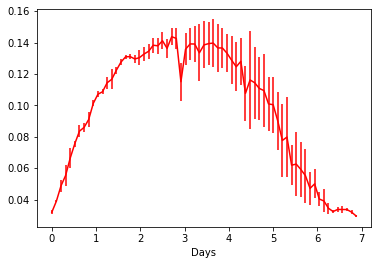

In [11]:
flag=1 #if flag is 1, average strains in duplicate and triplicate and estimate SE for plotting error bars
if flag==1:
  HB15_1_mean = HB15_1.mean(axis=1)
  #print(HB15_1_mean)
  yerr=HB15_1.std(axis=1)
  #yerr.append([np.mean(v) - min(v), max(v) - np.mean(v)])  # use max and min as upper and lower bound
  print(yerr)
  yerr = np.transpose(yerr)  # yerr should be 2xN matrix
  plt.errorbar(data['Time'],HB15_1_mean, yerr=yerr, color='r')
  plt.xlabel('Days')

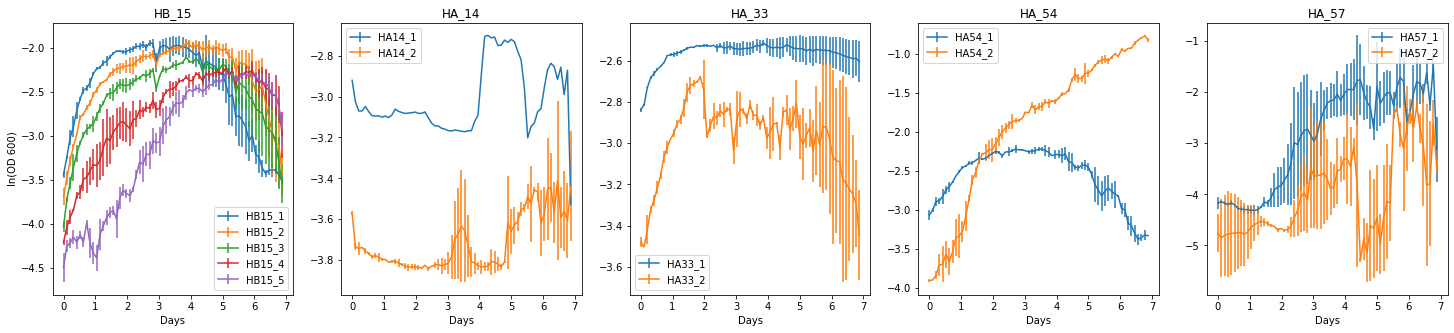

In [12]:
if flag==1:
  fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25,5))

  ax1.errorbar(data['Time'],np.log(HB15_1.mean(axis=1)), yerr=np.log(HB15_1).std(axis=1), label='HB15_1')
  ax1.errorbar(data['Time'],np.log(HB15_2.mean(axis=1)), yerr=np.log(HB15_2).std(axis=1), label='HB15_2')
  ax1.errorbar(data['Time'],np.log(HB15_3.mean(axis=1)), yerr=np.log(HB15_3).std(axis=1), label='HB15_3')
  ax1.errorbar(data['Time'],np.log(HB15_4.mean(axis=1)), yerr=np.log(HB15_4).std(axis=1), label='HB15_4')
  ax1.errorbar(data['Time'],np.log(HB15_5.mean(axis=1)), yerr=np.log(HB15_5).std(axis=1), label='HB15_5')
  ax1.title.set_text('HB_15')
  ax1.set_ylabel('ln(OD 600)')
  ax1.set_xlabel('Days')
  ax1.legend()

  ax2.errorbar(data['Time'],np.log(HA14_1.mean(axis=1)),yerr=np.log(HA14_1).std(axis=1), label='HA14_1')
  ax2.errorbar(data['Time'],np.log(HA14_2.mean(axis=1)),yerr=np.log(HA14_2).std(axis=1), label='HA14_2')
  ax2.title.set_text('HA_14')
  ax2.set_xlabel('Days')
  ax2.legend()

  ax3.errorbar(data['Time'],np.log(HA33_1.mean(axis=1)),yerr=np.log(HA33_1).std(axis=1), label='HA33_1')
  ax3.errorbar(data['Time'],np.log(HA33_2.mean(axis=1)),yerr=np.log(HA33_2).std(axis=1), label='HA33_2')
  ax3.title.set_text('HA_33')
  ax3.set_xlabel('Days')
  ax3.legend()

  ax4.errorbar(data['Time'],np.log(HA54_1.mean(axis=1)),yerr=np.log(HA54_1).std(axis=1), label='HA54_1')
  ax4.errorbar(data['Time'],np.log(HA54_2.mean(axis=1)),yerr=np.log(HA54_2).std(axis=1), label='HA54_2')
  ax4.title.set_text('HA_54')
  ax4.set_xlabel('Days')
  ax4.legend()

  ax5.errorbar(data['Time'],np.log(HA57_1.mean(axis=1)),yerr=np.log(HA57_1).std(axis=1), label='HA57_1')
  ax5.errorbar(data['Time'],np.log(HA57_2.mean(axis=1)),yerr=np.log(HA57_2).std(axis=1), label='HA57_2')
  ax5.title.set_text('HA_57')
  ax5.set_xlabel('Days')
  ax5.legend()



  plt.show()

In [13]:
HA33_2

,D7,D8
0,0.031333,0.030333
1,0.030067,0.030067
2,0.031100,0.034300
3,0.035633,0.036533
4,0.037033,0.038433
...,...,...
62,0.054000,0.027900
63,0.049533,0.030133
64,0.046600,0.031100
65,0.042567,0.031567


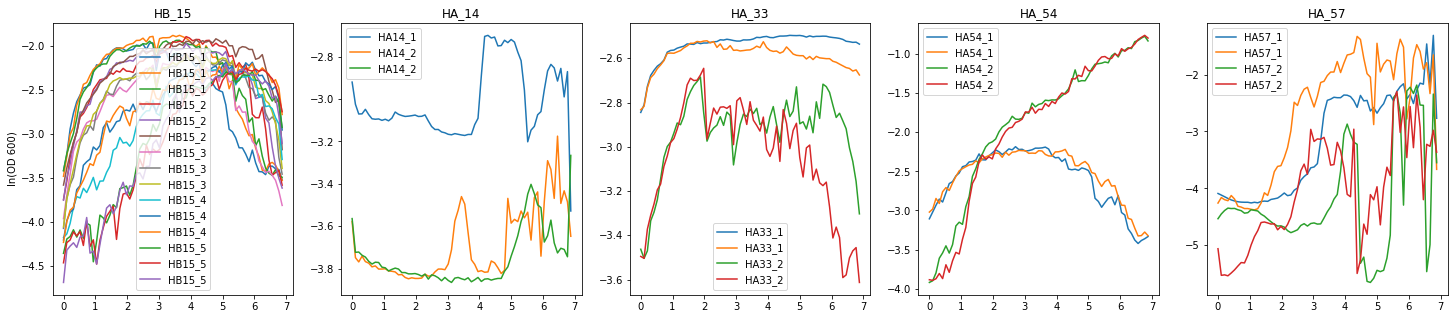

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25,5))

ax1.plot(data['Time'],np.log(HB15_1),label='HB15_1')
ax1.plot(data['Time'],np.log(HB15_2),label='HB15_2')
ax1.plot(data['Time'],np.log(HB15_3),label='HB15_3')
ax1.plot(data['Time'],np.log(HB15_4),label='HB15_4')
ax1.plot(data['Time'],np.log(HB15_5),label='HB15_5')
ax1.title.set_text('HB_15')
ax1.set_ylabel('ln(OD 600)')
ax1.legend()

ax2.plot(data['Time'],np.log(HA14_1),label='HA14_1')
ax2.plot(data['Time'],np.log(HA14_2),label='HA14_2')
ax2.title.set_text('HA_14')
ax2.legend()

ax3.plot(data['Time'],np.log(HA33_1),label='HA33_1')
ax3.plot(data['Time'],np.log(HA33_2),label='HA33_2')
ax3.title.set_text('HA_33')
ax3.legend()

ax4.plot(data['Time'],np.log(HA54_1),label='HA54_1')
ax4.plot(data['Time'],np.log(HA54_2),label='HA54_2')
ax4.title.set_text('HA_54')
ax4.legend()

ax5.plot(data['Time'],np.log(HA57_1),label='HA57_1')
ax5.plot(data['Time'],np.log(HA57_2),label='HA57_2')
ax5.title.set_text('HA_57')
ax5.legend()



plt.show()

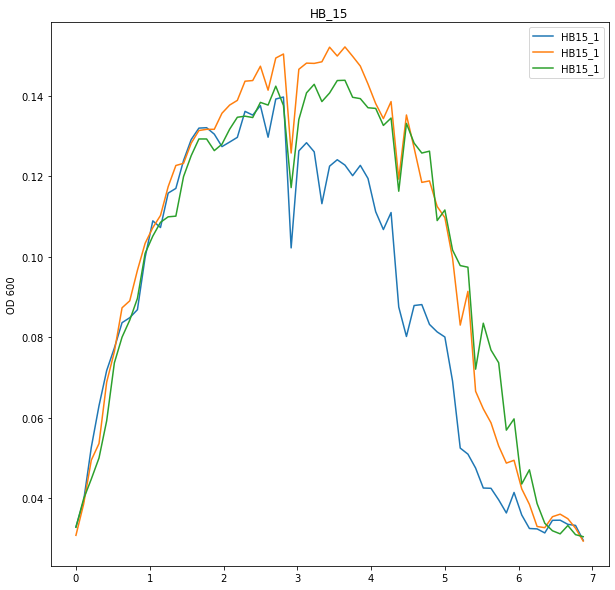

In [18]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,10))

ax1.plot(data['Time'],HB15_1,label='HB15_1')
#ax1.plot(data['Time'],np.log(HB15_2),label='HB15_2')
#ax1.plot(data['Time'],np.log(HB15_3),label='HB15_3')
#ax1.plot(data['Time'],np.log(HB15_4),label='HB15_4')
#ax1.plot(data['Time'],np.log(HB15_5),label='HB15_5')
ax1.title.set_text('HB_15')
ax1.set_ylabel('OD 600')
ax1.legend()

In [16]:
HB15_1

,C2,C3,C4
0,0.032800,0.030700,0.032700
1,0.039267,0.038467,0.039767
2,0.052600,0.049400,0.044700
3,0.062933,0.053533,0.049933
4,0.071700,0.068800,0.059200
...,...,...,...
62,0.034433,0.035333,0.031833
63,0.034467,0.035967,0.031067
64,0.033433,0.034833,0.033133
65,0.033167,0.032467,0.030867
